# Elevation<br>
## Purpose
Evaluates the effect of elevation in a countries ability to win medals
## Datasets
<b>Elevation.csv</b>

Import Necessary Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path
from sklearn.linear_model import LinearRegression 
import math

Loads in dataset

In [123]:
filepath = '../../data/analysis/elevation_data.csv'
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [124]:
df.head()

,Unnamed: 0,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,...,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita,Code,Lowest_Point,Highest_Point,Elevation_Range,Education_Index
0,0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
1,1,1960,ITA,Rome,True,False,4727,611,5338,Sailing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
2,2,1960,ITA,Rome,True,False,4727,611,5338,Sailing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
3,3,1960,ITA,Rome,True,False,4727,611,5338,Boxing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
4,4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN


Some of the columns in the dataframa are not useful for reaserach into elevation

In [125]:
df.columns

Index(['Unnamed: 0', 'Year', 'Host_Country', 'Host_City', 'Summer', 'Winter',
       'Total_Males', 'Total_Females', 'Total_Athletes', 'Discipline', 'Sport',
       'Ath_Name', 'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'NOC_Gold', 'NOC_Silver',
       'NOC_Bronze', 'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Country',
       'Population', 'Males', 'Females', 'Life_Expectancy', 'GDP', 'Region',
       'Elevation', 'Area_SqKM', 'Centroid_Longitude', 'Centroid_Latitude',
       'Population_Density', 'CO2_Emissions', 'Methane_Emissions',
       'Nitrous_Oxide_Emisions', 'Total_Emissions', 'Emmisions_per_Capita',
       'Code', 'Lowest_Point', 'Highest_Point', 'Elevation_Range',
       'Education_Index'],
      dtype='object')

The following columns we decided were valid to out study

In [126]:
df = df[['Year', 'Host_Country', 'Host_City', 'Summer', 'Winter',
       'Total_Males', 'Total_Females', 'Total_Athletes', 'Discipline', 'Sport',
       'Ath_Name', 'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Country', 'Region',
       'Elevation', 'Area_SqKM', 'Centroid_Longitude', 'Centroid_Latitude',
        'Lowest_Point', 'Highest_Point', 'Elevation_Range']]
df.head()

,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,Sport,...,NOC_Total_Sent,Country,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Lowest_Point,Highest_Point,Elevation_Range
0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,91.0,Argentina,South America,595.6200,2775401.0,-64.92097,-35.38706,-105.0,6962.0,7067.0
1,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,91.0,Argentina,South America,595.6200,2775401.0,-64.92097,-35.38706,-105.0,6962.0,7067.0
2,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,91.0,Argentina,South America,595.6200,2775401.0,-64.92097,-35.38706,-105.0,6962.0,7067.0
3,1960,ITA,Rome,True,False,4727,611,5338,Boxing,Boxing,...,91.0,Argentina,South America,595.6200,2775401.0,-64.92097,-35.38706,-105.0,6962.0,7067.0
4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,194.0,Australia,Oceania,272.4731,7662592.0,134.61310,-25.84766,-15.0,2228.0,2243.0


Checks to see what null values exist for elevation

In [127]:
df[df.Elevation.isnull()]

,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,Sport,...,NOC_Total_Sent,Country,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Lowest_Point,Highest_Point,Elevation_Range
3564,1972,DEU,Munich,True,False,6075,1059,7134,Weightlifting,Weightlifting,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6201,1980,RUS,Moscow,True,False,4064,1115,5179,Wrestling Greco-Roman,Wrestling,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,1988,KOR,Seoul,True,False,6197,2194,8391,Sailing,Sailing,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11037,1992,ESP,Barcelone,True,False,6652,2704,9356,Shooting,Shooting,...,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11038,1992,ESP,Barcelone,True,False,6652,2704,9356,Shooting,Shooting,...,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11039,1992,ESP,Barcelone,True,False,6652,2704,9356,Shooting,Shooting,...,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24399,2016,BRA,Rio,True,False,6165,5054,11219,Shooting,Shooting,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24400,2016,BRA,Rio,True,False,6165,5054,11219,Shooting,Shooting,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
len(df[df.Elevation.isnull()])

8

The data above relates to eight medal winning athletes from NOCs for whom we were unable to obtain data on, we have amde the decision to remove these lines as they will skew our results 

In [129]:
df = df[df.Elevation.notnull()]
len(df)

25292

## Group the data by Country
To be able to examine what effect elevation has we had to group thhe data by country

In [130]:
countryDF = df.groupby(['Country','Elevation','Lowest_Point','Highest_Point','Elevation_Range','Sport'])\
            ['Gold', 'Silver','Bronze', 'Total_Medals','Ath_Rating'].sum()

countryDF = countryDF.reset_index()
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1


## Finding Medal Share

The first step is to establish how many medals have been awarded in each games 

In [131]:
totMeds = df.groupby(['Sport'])[['Gold','Total_Medals','Ath_Rating']].sum()
totMeds.head(40)

,Gold,Total_Medals,Ath_Rating
Sport,,,
Aquatics,1224,3541,7161
Archery,72,216,432
Athletics,820,2449,4912
Badminton,55,170,335
Baseball,111,335,669
Basketball,312,931,1864
Biathlon,136,403,807
Bobsleigh,96,298,588
Boxing,172,687,1202


### Gold Share
Evaluating what fraction of the gold medals were awarded to a given country in a given event

In [132]:
countryDF['Gold_Share'] = countryDF.apply(lambda x: x.Gold/totMeds.loc[x.Sport].Gold, axis=1 )
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000


### Medal Share
Evaluating what fraction of the medals were awarded to a given country in a given event

In [133]:
countryDF['Medal_Share'] = countryDF.apply(lambda x: x.Total_Medals/totMeds.loc[x.Sport].Total_Medals, axis=1 )
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282


### Rating Share
Evaluating what fraction of the rating were awarded to a given country in a given event

In [134]:
countryDF['Rating_Share'] = countryDF.apply(lambda x: x.Ath_Rating/totMeds.loc[x.Sport].Ath_Rating, axis=1 )
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889,0.007576
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675,0.004072
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734,0.006656
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656,0.003135
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282,0.000140


# Normalising the data

In [135]:
def minMaxNorm(mn,mx,val):
    return (val-mn)/(mx-mn)

### Gold_Share

In [136]:
mn = countryDF['Gold_Share'].min()
mx = countryDF['Gold_Share'].max()
countryDF['norm_Gold_Share'] = countryDF['Gold_Share'].apply(lambda x: minMaxNorm(mn,mx,x))
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889,0.007576,0.000000
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675,0.004072,0.005386
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734,0.006656,0.006420
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656,0.003135,0.000000
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282,0.000140,0.000000


### Medal_Share

In [137]:
mn = countryDF['Medal_Share'].min()
mx = countryDF['Medal_Share'].max()
countryDF['norm_Medal_Share'] = countryDF['Medal_Share'].apply(lambda x: minMaxNorm(mn,mx,x))
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889,0.007576,0.000000,0.028608
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675,0.004072,0.005386,0.007133
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734,0.006656,0.006420,0.017769
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656,0.003135,0.000000,0.007094
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282,0.000140,0.000000,0.000000


### Rating_Share

In [138]:
mn = countryDF['Rating_Share'].min()
mx = countryDF['Rating_Share'].max()
countryDF['norm_Rating_Share'] = countryDF['Rating_Share'].apply(lambda x: minMaxNorm(mn,mx,x))
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889,0.007576,0.000000,0.028608,0.012271
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675,0.004072,0.005386,0.007133,0.006488
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734,0.006656,0.006420,0.017769,0.010752
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656,0.003135,0.000000,0.007094,0.004942
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282,0.000140,0.000000,0.000000,0.000000


### Avearge Elevation

In [139]:
mn = countryDF['Elevation'].min()
mx = countryDF['Elevation'].max()
countryDF['norm_Elevation'] = countryDF['Elevation'].apply(lambda x: minMaxNorm(mn,mx,x))
countryDF.head()

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,norm_Elevation
0,Afghanistan,1884.7100,258.0,7492.0,7234.0,Taekwondo,0,0,2,2,2,0.000000,0.013889,0.007576,0.000000,0.028608,0.012271,0.591575
1,Algeria,572.8028,-40.0,2908.0,2948.0,Athletics,4,3,2,9,20,0.004878,0.003675,0.004072,0.005386,0.007133,0.006488,0.179792
2,Algeria,572.8028,-40.0,2908.0,2948.0,Boxing,1,0,5,6,8,0.005814,0.008734,0.006656,0.006420,0.017769,0.010752,0.179792
3,Algeria,572.8028,-40.0,2908.0,2948.0,Judo,0,1,1,2,3,0.000000,0.003656,0.003135,0.000000,0.007094,0.004942,0.179792
4,Argentina,595.6200,-105.0,6962.0,7067.0,Aquatics,0,0,1,1,1,0.000000,0.000282,0.000140,0.000000,0.000000,0.000000,0.186954


In [155]:
sports = countryDF.Sport.unique()

In [174]:
index = []
data = []
for sport in sports:
    temp = countryDF[countryDF.Sport == sport]
    cor = temp.Elevation.corr(temp.norm_Rating_Share)
    index.append(sport)
    data.append(cor)

correlations = pd.Series(index = index,data=data)
correlations.head()

Taekwondo    0.242204
Athletics   -0.018509
Boxing      -0.100885
Judo        -0.113278
Aquatics     0.144555
dtype: float64

In [191]:
correlations.sort_values()

Rugby               -0.770750
Golf                -0.756169
Baseball            -0.547878
Softball            -0.505358
Hockey              -0.425364
Handball            -0.246903
Luge                -0.178963
Football            -0.144773
Canoe               -0.138133
Judo                -0.113278
Curling             -0.109900
Boxing              -0.100885
Rowing              -0.097824
Ice Hockey          -0.060626
Biathlon            -0.059516
Modern Pentathlon   -0.055171
Fencing             -0.054699
Wrestling           -0.052426
Triathlon           -0.041923
Equestrian          -0.038196
Cycling             -0.019227
Athletics           -0.018509
Archery              0.011361
Sailing              0.071551
Volleyball           0.083614
Tennis               0.090599
Skating              0.137370
Skiing               0.140799
Aquatics             0.144555
Basketball           0.169164
Shooting             0.202250
Taekwondo            0.242204
Bobsleigh            0.289141
Gymnastics

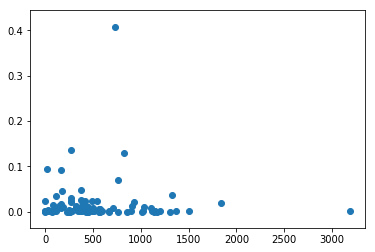

In [189]:
temp = countryDF[countryDF.Sport == 'Athletics']
plt.scatter(temp.Elevation,temp.norm_Rating_Share)
plt.show()

In [190]:
temp[temp.norm_Rating_Share > .3]

,Country,Elevation,Lowest_Point,Highest_Point,Elevation_Range,Sport,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,norm_Elevation
1018,United States,725.6519,-86.0,6190.0,6276.0,Athletics,274,148,98,520,1216,0.334146,0.212332,0.247557,0.368953,0.445836,0.40827,0.227768
